# Домашнее задание к лекции «Корреляция и корреляционный анализ»

В датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

## Задание 1.
## Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

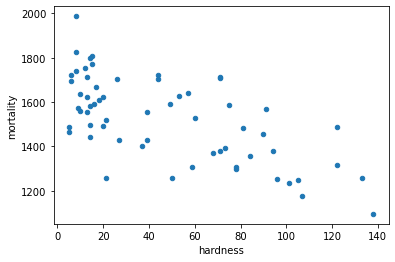

In [3]:
# Попробуем определить влияет ли жесткость воды на смертность населения.
# Построим точечный график для визуального отображения взаимосвязи между жесткостью воды и смертностью. 
data.plot(kind='scatter', x='hardness', y='mortality')

In [4]:
# По графику можно сделать вывод, что если линейная взаимосвязь и есть, то она обратная. Т.е. с увеличением значения жесткости
# воды значение показателя смертности уменьшается

In [5]:
# рассчитаем коэффициент корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# рассчитаем коэффициент корреляции Спирмена
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
# Значения коэффициентов корреляции по модулю ближе к 1, чем 0, т.е. можно говорить о наличии средней линейной взаимосвязи.
# Отрицательные значение коэффициента корреляции также говорят об обратной взаимосвязи. 

In [8]:
# Построим модель линейной регрессии. 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = data[['hardness']]
y = data['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [13]:
model.coef_

array([-3.43995111])

In [14]:
model.intercept_

1678.3265982907678

Т.о. наша модель будет задаваться выражением y=-3.43995111*x + 1678.3265982907678

In [15]:
# Протестируем модель на тестовых данных, спрогнозируем значения смертности
y_pred = model.predict(X_test)
y_pred

array([1619.84742945, 1657.68689164, 1647.36703832, 1544.16850508,
       1509.76899399, 1434.09006962, 1399.69055854, 1330.89153637,
       1643.92708721, 1220.81310091, 1420.33026518, 1203.61334537,
       1258.6525631 , 1258.6525631 , 1650.80698943, 1410.01041186,
       1434.09006962, 1630.16728278, 1544.16850508])

In [16]:
# Сравним прогнозные значения с фактическими
res_data=X_test.copy()
res_data['y_pred']=y_pred
res_data['y_test']=y_test
res_data

,hardness,y_pred,y_test
1,17,1619.847429,1668
36,6,1657.686892,1724
23,9,1647.367038,1574
17,39,1544.168505,1428
44,49,1509.768994,1591
60,71,1434.090070,1378
59,81,1399.690559,1485
41,101,1330.891536,1236
8,10,1643.927087,1637
34,133,1220.813101,1259


In [17]:
# рассчитаем значение коэффициента детерминации
model.score(X_test, y_test) 

0.5403737075686553

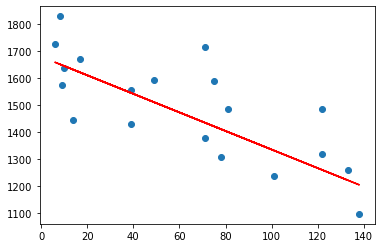

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

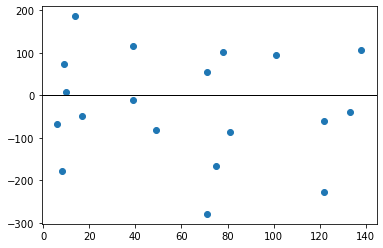

In [19]:
# Выведем график остатков (Если я правильно понял, то по оси y отмеряется разница между прогнозными и фактическими значениями
# смертности для каждого значения жесткости воды по оси x. Для ориентира изобразим горизонтальную ось x)
plt.scatter(X_test, y_pred - y_test)
plt.axhline(y=0, color='k',  linewidth=1, linestyle='-') 

### Итого: на поставленный вопрос можно ответить положительно. Взаимосвязь наблюдается и для нее есть возможность построить модель линейной регресии

## Задание 2.
## Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [20]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [21]:
# Разделим данные на 2 группы: север и юг.
north = data.loc[data.location =='North']
south = data.loc[data.location =='South']

## 1) Анализ северных городов

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

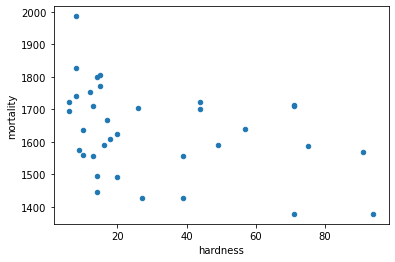

In [22]:
# Построим точечный график для визуального отображения взаимосвязи между жесткостью воды и смертностью. 
north.plot(kind='scatter', x='hardness', y='mortality')

In [23]:
# По графику так же можно сделать вывод, что если линейная взаимосвязь и есть, то она обратная. Т.е. с увеличением значения 
# жесткости воды значение показателя смертности уменьшается

In [24]:
# рассчитаем коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [25]:
# рассчитаем коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [26]:
# Значения коэффициентов корреляции по модулю уже ближе к 0, чем 1, т.е. можно говорить о наличии слабой линейной взаимосвязи.
# Отрицательные значение коэффициента корреляции также говорят об обратной взаимосвязи. 

In [27]:
# Построим модель линейной регрессии. 

In [28]:
X_n = north[['hardness']]
y_n = north['mortality']

In [29]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30, random_state=50)

In [30]:
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [31]:
model_n.coef_

array([-1.52496549])

In [32]:
model_n.intercept_

1676.453976155025

Т.о. модель для северных городов будет задаваться выражением y=-1.52496549*x + 1676.453976155025

In [33]:
# Протестируем модель на тестовых данных, спрогнозируем значения смертности
y_n_pred = model_n.predict(X_n_test)
y_n_pred

array([1655.10445925, 1601.73066699, 1635.27990784, 1664.25425221,
       1656.62942474, 1667.3041832 , 1653.57949376, 1616.98032192,
       1664.25425221, 1655.10445925, 1655.10445925])

In [34]:
# Сравним прогнозные значения с фактическими
res_north=X_n_test.copy()
res_north['y_n_pred']=y_n_pred
res_north['y_n_test']=y_n_test
res_north

,hardness,y_n_pred,y_n_test
3,14,1655.104459,1800
44,49,1601.730667,1591
35,27,1635.279908,1427
22,8,1664.254252,1742
42,13,1656.629425,1711
36,6,1667.304183,1724
28,15,1653.579494,1772
16,39,1616.980322,1555
45,8,1664.254252,1987
46,14,1655.104459,1495


In [35]:
# рассчитаем значение коэффициента детерминации
model_n.score(X_n_test, y_n_test) 

0.09277934694062606

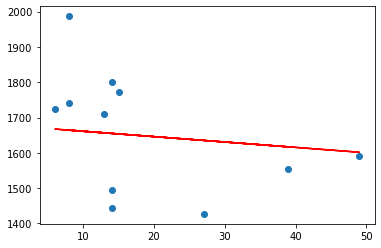

In [36]:
# Визуализируем модель
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

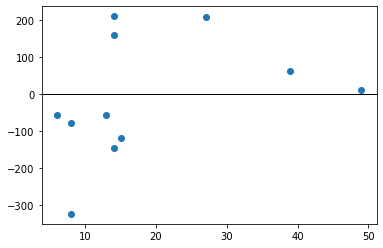

In [37]:
# Выведем график остатков. Для ориентира изобразим горизонтальную ось x.
plt.scatter(X_n_test, y_n_pred - y_n_test)
plt.axhline(y=0, color='k',  linewidth=1, linestyle='-') 

In [38]:
# значения остатков для дочерней группы "север" такого же порядка как и для основной группы данных 

## 2) Анализ южных городов

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

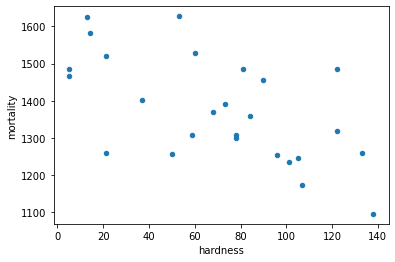

In [39]:
# Построим точечный график для визуального отображения взаимосвязи между жесткостью воды и смертностью. 
south.plot(kind='scatter', x='hardness', y='mortality')

In [40]:
# По графику выводы те же самые: если линейная взаимосвязь и есть, то она обратная. Т.е. с увеличением значения 
# жесткости воды значение показателя смертности уменьшается

In [41]:
# рассчитаем коэффициент корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [42]:
# рассчитаем коэффициент корреляции Спирмена
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [43]:
# Здесь значения коэффициентов корреляции по модулю ближе к 1, чем 0, т.е. можно говорить о наличии
# средней линейной взаимосвязи. Отрицательные значение коэффициента корреляции также говорят об 
# обратной взаимосвязи. 

In [44]:
# Построим модель линейной регрессии. 
X_s = south[['hardness']]
y_s = south['mortality']

In [45]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.30, random_state=50)

In [46]:
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train) 

LinearRegression()

In [47]:
model_s.coef_

array([-2.62746486])

In [48]:
model_s.intercept_

1542.4214052518007

Т.о. модель для южных городов будет задаваться выражением y=-2.62746486*x + 1542.4214052518007

In [49]:
# Протестируем модель на тестовых данных, спрогнозируем значения смертности
y_s_pred = model_s.predict(X_s_test)
y_s_pred

array([1505.63689724, 1221.87069257, 1221.87069257, 1487.24464323,
       1192.96857913, 1261.28266544, 1508.2643621 , 1329.59675175])

In [50]:
# Сравним прогнозные значения с фактическими
res_south=X_s_test.copy()
res_south['y_s_pred']=y_s_pred
res_south['y_s_test']=y_s_test
res_south

,hardness,y_s_pred,y_s_test
32,14,1505.636897,1581
18,122,1221.870693,1318
58,122,1221.870693,1486
19,21,1487.244643,1260
34,133,1192.968579,1259
37,107,1261.282665,1175
54,13,1508.264362,1625
59,81,1329.596752,1485


In [51]:
# рассчитаем значение коэффициента детерминации
model_s.score(X_s_test, y_s_test) 

0.045758667765418704

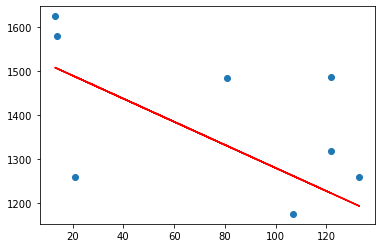

In [52]:
# Визуализируем модель
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

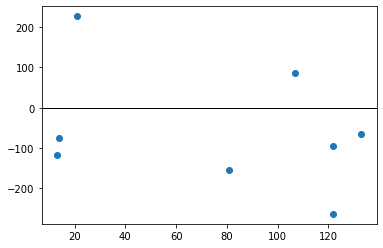

In [53]:
# Выведем график остатков. Для ориентира изобразим горизонтальную ось x.
plt.scatter(X_s_test, y_s_pred - y_s_test)
plt.axhline(y=0, color='k',  linewidth=1, linestyle='-') 

In [54]:
# значения остатков для группы "юг" такого же порядка как и для основной группы данных

### Итого для второго вопроса: на поставленный вопрос так же можно ответить положительно. Несмотря на очень ограниченнное количество данных взаимосвязь в какой-то степени сохраняется и для северных, и для южных городов. И в обоих случаях есть возможность построить модель линейной регресии. 